In [1]:
# import libraries

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# data ETL and analysis
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity

In [2]:
# modify pyplot defaults

# DEFINE FUNCTIONS

In [3]:
def scatterPlot(x, y, **kwargs):
    '''
    Function for creating basic scatterplot in pyplot
    '''
    
    fig, ax = plt.subplots(1, 1)
    
    col = kwargs.get('c', 'black')
    alp = kwargs.get('alpha', 1.0)
    zor = kwargs.get('zorder', 1)
    ax.scatter(x, 
               y, 
               #c=col, 
               #alpha=alp, 
               #zorder=zor
               **kwargs
              )
    
    return fig, ax

# EXTRACT DATA

In [4]:
# main sheet for NHL13-14.xls file from Hockey Abstract
path = '../data/'
filename = 'nhlPlayerStats_13-14_main_utf8.csv'
df_hockeyAbs_main = pd.read_csv(path + filename, 
                           #nrows=1, 
                           #encoding='utf_16'
                          )

df_hockeyAbs_main

,#,DOB,Birth City,S/P,Ctry,HT,Wt,S,Draft,Round,...,GVT/G,GVT/60,Full,LTIR,SOIR,Ginj,Injury,Cap Cost,Bonuses,GVS
0,56.0,Apr 30 '88,Hamilton,ON,CAN,69.0,170.0,R,NaN,NaN,...,-0.40,-4.56,NaN,NaN,NaN,NaN,NaN,650000.0,NaN,-1.5
1,8.0,Feb 25 '87,Muskegon,MI,USA,73.0,219.0,L,2005.0,2.0,...,0.06,0.24,NaN,NaN,NaN,12.0,"Head, Groin",1800000.0,NaN,1.0
2,41.0,Jul 16 '87,Edina,MN,USA,73.0,199.0,L,NaN,NaN,...,0.05,0.39,NaN,NaN,NaN,NaN,NaN,680000.0,NaN,0.4
3,72.0,Jun 18 '90,St. John's,NL,CAN,74.0,206.0,L,2008.0,2.0,...,-0.05,-0.23,NaN,NaN,NaN,NaN,NaN,735000.0,NaN,-1.9
4,27.0,Apr 26 '77,Seria,NaN,BRN,72.0,200.0,R,1996.0,9.0,...,0.01,0.06,NaN,NaN,NaN,NaN,NaN,700000.0,NaN,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# print list of features in Hockey Abstract DF
for i in range(df_hockeyAbs_main.shape[1]):
    print(i, df_hockeyAbs_main.columns[i])

0 #
1 DOB
2 Birth City
3 S/P
4 Ctry
5 HT
6 Wt
7 S
8 Draft
9 Round
10 Overall
11 Rk
12 Age
13 BTN Code
14 First Name
15 Last Name
16 End Team
17 Teams
18 OGP
19 Pos
20 GP
21 G
22 A
23 PTS
24 +/-
25 Sh
26 Miss
27 Blkd
28 Sh%
29 CoSH%
30 Dist
31 Wrist
32 Snap
33 Slap
34 TOI
35 TOI/G
36 Shifts
37 Sh/G
38 TOI/Sh
39 Passes
40 Pa/60
41 IGP
42 IAP
43 IPP
44 FOW
45 FOL
46 FO%
47 %Tm
48 HitA
49 HitF
50 BkS
51 MsS
52 GvA
53 TkA
54 HA/60
55 HF/60
56 B/60
57 M/60
58 G/60
59 T/60
60 PIM
61 Minor
62 Major
63 Misc
64 G Misc
65 Match
66 NetPen
67 SOS
68 SOG
69 SO%
70 SOGDG
71 1G
72 OTGP
73 OTG
74 OTA
75 GWG
76 ENG
77 PSG
78 PST
79 PS%
80 DIA
81 OPS
82 DPS
83 PS
84 PS/G
85 PS/60
86 OGIT
87 DIT
88 RPM
89 OGVT
90 DGVT
91 SGVT
92 GVT
93 GVT/G
94 GVT/60
95 Full
96 LTIR
97 SOIR
98 Ginj
99 Injury
100 Cap Cost
101 Bonuses
102 GVS


In [6]:
# print list of unique values in position feature
print(df_hockeyAbs_main['Pos'].unique())

['LW/RW' 'LW/C' 'C/RW' 'C/LW' 'RW' 'LW' 'C' 'D' 'RW/LW' 'RW/C/LW' 'LW/D'
 'RW/C' 'RW/D' 'C/D' 'LW/RW/C' 'C/RW/LW' 'RW/LW/C' 'C/LW/RW' 'LW/C/RW' nan]


**$\bullet$ position feature seems too complex to interpret, so I will exclude it from consideration**

In [7]:
# create list to identify features of interest
# TO DO: change name of exploreCols list
exploreCols = ['G', 'A', 'Sh', 'Miss', 'Blkd', 'Sh%', 'CoSH%', 'Dist', 'Wrist', 'Snap', 'Slap', 'Shifts', 'Passes', 'IGP', 'IAP', 
               'FO%', '%Tm', 'HitA', 'HitF', 'GvA', 'TkA', 'PIM', 'Minor', 'Major', 'Misc', 'G Misc', 'Match', 'OGIT', 'DIT']
print('Number of features selected to explore:', len(exploreCols))

Number of features selected to explore: 29


In [8]:
# print summary table for features of interest
df_hockeyAbs_main[exploreCols].describe()

,G,A,Sh,Miss,Blkd,Dist,Wrist,Snap,Slap,Shifts,...,GvA,TkA,PIM,Minor,Major,Misc,G Misc,Match,OGIT,DIT
count,886.000000,886.00000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,...,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,7.417607,12.67833,83.400677,32.560948,39.232506,35.738826,41.299097,11.703160,16.297968,1086.847630,...,20.565463,18.217833,29.680587,10.181716,1.098194,0.260722,0.088036,0.013544,16.928894,16.929345
std,8.531993,12.54575,70.937266,28.175523,35.129592,12.871444,37.728943,12.745529,20.584656,729.330123,...,19.349877,16.390053,30.238013,8.664216,2.476205,0.767101,0.306489,0.115653,13.030131,12.334700
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,1.000000,2.00000,20.000000,8.000000,9.000000,27.525000,9.000000,2.000000,2.000000,346.250000,...,4.000000,4.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.300000,4.700000
50%,4.000000,9.00000,72.000000,28.000000,32.000000,31.850000,32.000000,8.000000,9.000000,1175.500000,...,16.000000,15.000000,22.000000,9.000000,0.000000,0.000000,0.000000,0.000000,15.900000,16.950000
75%,11.000000,20.00000,128.750000,51.000000,61.000000,47.175000,65.000000,18.000000,22.000000,1700.000000,...,32.000000,29.000000,41.750000,15.000000,1.000000,0.000000,0.000000,0.000000,27.075000,26.500000
max,51.000000,68.00000,386.000000,181.000000,206.000000,103.500000,189.000000,101.000000,144.000000,2623.000000,...,115.000000,83.000000,213.000000,47.000000,19.000000,7.000000,2.000000,1.000000,55.500000,47.000000


**$\bullet$ Minor, Major, Misc, G Misc, and Match features are quoted as number of penalties taken (not number of minutes)**

In [9]:
# identify which features are cumulative (i.e., function of TOI) and should be considered for normalisation
cumulative = {}
cumulative['G'] = True
cumulative['A'] = True
cumulative['Sh'] = True
cumulative['Miss'] = True
cumulative['Blkd'] = True
cumulative['Sh%'] = False
cumulative['CoSH%'] = False
cumulative['Dist'] = False
cumulative['Wrist'] = True
cumulative['Snap'] = True
cumulative['Slap'] = True
cumulative['Shifts'] = True
cumulative['Passes'] = True
cumulative['IGP'] = False
cumulative['IAP'] = False
cumulative['FO%'] = False
cumulative['%Tm'] = False
cumulative['HitA'] = True
cumulative['HitF'] = True
cumulative['GvA'] = True
cumulative['TkA'] = True
cumulative['PIM'] = True
cumulative['Minor'] = True
cumulative['Major'] = True
cumulative['Misc'] = True
cumulative['G Misc'] = True
cumulative['Match'] = True
cumulative['OGIT'] = True
cumulative['DIT'] = True

# TRANSFORM DATA FOR EXPLORATION

In [10]:
# identify and remove empty rows from Hockey Abstract DF
keepRow = ~np.isnan(df_hockeyAbs_main.loc[:, '#']).values

df_hockeyAbs_main_nonempty = df_hockeyAbs_main.loc[keepRow, :]
df_hockeyAbs_main_nonempty

,#,DOB,Birth City,S/P,Ctry,HT,Wt,S,Draft,Round,...,GVT/G,GVT/60,Full,LTIR,SOIR,Ginj,Injury,Cap Cost,Bonuses,GVS
0,56.0,Apr 30 '88,Hamilton,ON,CAN,69.0,170.0,R,NaN,NaN,...,-0.40,-4.56,NaN,NaN,NaN,NaN,NaN,650000.0,NaN,-1.5
1,8.0,Feb 25 '87,Muskegon,MI,USA,73.0,219.0,L,2005.0,2.0,...,0.06,0.24,NaN,NaN,NaN,12.0,"Head, Groin",1800000.0,NaN,1.0
2,41.0,Jul 16 '87,Edina,MN,USA,73.0,199.0,L,NaN,NaN,...,0.05,0.39,NaN,NaN,NaN,NaN,NaN,680000.0,NaN,0.4
3,72.0,Jun 18 '90,St. John's,NL,CAN,74.0,206.0,L,2008.0,2.0,...,-0.05,-0.23,NaN,NaN,NaN,NaN,NaN,735000.0,NaN,-1.9
4,27.0,Apr 26 '77,Seria,NaN,BRN,72.0,200.0,R,1996.0,9.0,...,0.01,0.06,NaN,NaN,NaN,NaN,NaN,700000.0,NaN,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,2.0,Feb 03 '77,Most,NaN,CZE,71.0,190.0,R,2001.0,6.0,...,0.14,0.39,NaN,NaN,NaN,1.0,Upper body,4000000.0,NaN,4.3
882,39.0,Sep 01 '87,Toronto,ON,CAN,71.0,185.0,L,NaN,NaN,...,0.04,0.23,NaN,NaN,NaN,NaN,NaN,550000.0,NaN,-0.5
883,8.0,Jun 16 '78,Elektrenai,NaN,LTU,77.0,225.0,L,1996.0,1.0,...,0.06,0.20,NaN,NaN,NaN,NaN,NaN,3100000.0,NaN,-0.7
884,36.0,Sep 01 '87,Oslo,NaN,NOR,67.0,179.0,L,NaN,NaN,...,0.19,0.65,NaN,NaN,NaN,4.0,Hand,1150000.0,NaN,12.3


Text(0, 0.5, 'TOI')

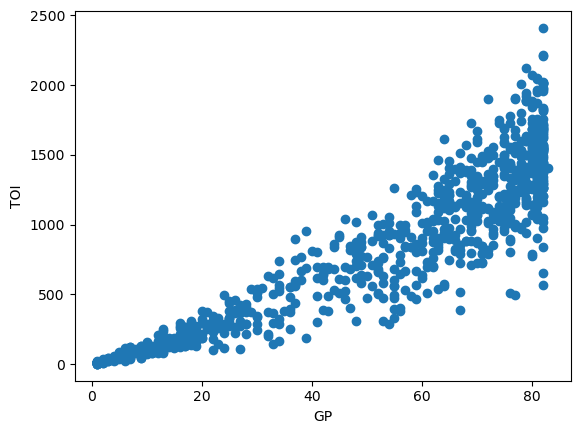

In [11]:
# plot TOI vs GP from df_hockeyAbs_main_nonempty
fig, ax = scatterPlot(df_hockeyAbs_main_nonempty.GP, df_hockeyAbs_main_nonempty.TOI)
ax.set_xlabel('GP')
ax.set_ylabel('TOI')

**$\bullet$ TOI is an increasing function of GP, but with significant scatter at high GP**

In [12]:
# identify and remove players with less than 10 GP in df_hockeyAbs_main_nonempty
keepRow = df_hockeyAbs_main_nonempty.loc[:, 'GP'].values >= 10
df_hockeyAbs_main_nonempty_minGP = df_hockeyAbs_main_nonempty.loc[keepRow, :]
print('Players with >10 GP:', df_hockeyAbs_main_nonempty_minGP.shape[0])

Players with >10 GP: 750


In [13]:
# change data types of percentage features from str to float and normalise by 100
#df_hockeyAbs_main_nonempty_minGP['IGP'].apply(str.replace('%', '').astype(float))
#df_hockeyAbs_main_nonempty_minGP.loc[:, 'IGP'] = df_hockeyAbs_main_nonempty_minGP['IGP'].str.replace('%', '').astype(float)
#df_hockeyAbs_main_nonempty_minGP.loc[:, 'IAP'] = df_hockeyAbs_main_nonempty_minGP['IAP'].str.replace('%', '').astype(float)

cols = ['Sh%', 'CoSH%', 'FO%', '%Tm', 'IGP', 'IAP']
for col in cols:
    if col == '%Tm':
        df_hockeyAbs_main_nonempty_minGP.loc[:, col] = df_hockeyAbs_main_nonempty_minGP[col] / 1e2
    else:
        df_hockeyAbs_main_nonempty_minGP.loc[:, col] = df_hockeyAbs_main_nonempty_minGP[col].str.replace('%', '').astype(float) / 1e2

df_hockeyAbs_main_nonempty_minGP[cols]

,Sh%,CoSH%,FO%,%Tm,IGP,IAP
1,0.068,0.045,0.418,0.013,0.105,0.189
2,0.167,0.081,0.503,0.109,0.059,0.039
3,0.063,0.029,0.385,0.036,0.167,0.0
4,0.068,0.04,0.439,0.029,0.034,0.041
8,0.0,0.0,0.0,0.000,0.0,0.0
...,...,...,...,...,...,...
881,0.094,0.046,0.0,0.000,0.143,0.357
882,0.167,0.105,1.0,0.002,0.077,0.0
883,0.107,0.069,0.509,0.091,0.112,0.112
884,0.112,0.065,0.375,0.001,0.19,0.4


In [14]:
# normalise features of interest which are cumulative by TOI
df_hockeyAbs_main_nonempty_minGP_norm = df_hockeyAbs_main_nonempty_minGP.copy()

for key, value in cumulative.items():
    if value:
        df_hockeyAbs_main_nonempty_minGP_norm[key] /= df_hockeyAbs_main_nonempty_minGP_norm['TOI']

df_hockeyAbs_main_nonempty_minGP_norm[exploreCols]

,G,A,Sh,Miss,Blkd,Sh%,CoSH%,Dist,Wrist,Snap,...,GvA,TkA,PIM,Minor,Major,Misc,G Misc,Match,OGIT,DIT
1,0.009347,0.016824,0.137396,0.047668,0.023367,0.068,0.045,28.6,0.067296,0.023367,...,0.014020,0.019628,0.028975,0.012151,0.000935,0.0,0.000000,0.0,0.020002,0.018787
2,0.012290,0.008193,0.073740,0.032773,0.045063,0.167,0.081,28.9,0.032773,0.016387,...,0.016387,0.061450,0.086030,0.012290,0.012290,0.0,0.000000,0.0,0.017616,0.029906
3,0.006494,0.000000,0.103896,0.045455,0.077922,0.063,0.029,27.2,0.032468,0.012987,...,0.000000,0.006494,0.025974,0.012987,0.000000,0.0,0.000000,0.0,0.015584,0.012987
4,0.004893,0.005872,0.071443,0.026424,0.024467,0.068,0.04,36.4,0.038168,0.008808,...,0.015659,0.014680,0.045019,0.012723,0.001957,0.0,0.000979,0.0,0.016539,0.025935
8,0.000000,0.000000,0.067659,0.027064,0.081191,0.0,0.0,51.1,0.040595,0.013532,...,0.054127,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.021651,0.023004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,0.006843,0.017108,0.072993,0.028513,0.046191,0.094,0.046,45.3,0.013686,0.011405,...,0.033075,0.010835,0.034215,0.017108,0.000000,0.0,0.000000,0.0,0.024464,0.019332
882,0.015186,0.000000,0.091116,0.030372,0.022779,0.167,0.105,21.1,0.045558,0.007593,...,0.030372,0.022779,0.091116,0.045558,0.000000,0.0,0.000000,0.0,0.011390,0.010630
883,0.009035,0.009035,0.084092,0.024324,0.022239,0.107,0.069,27.4,0.033359,0.016679,...,0.013900,0.013205,0.031969,0.015984,0.000000,0.0,0.000000,0.0,0.018347,0.020919
884,0.014404,0.030324,0.128876,0.047002,0.047002,0.112,0.065,24.3,0.063680,0.021227,...,0.028808,0.033356,0.024259,0.012129,0.000000,0.0,0.000000,0.0,0.022970,0.018801


In [15]:
# re-print summary table for features of interest (unnormalised case)
df_hockeyAbs_main_nonempty_minGP[exploreCols].describe()

,G,A,Sh,Miss,Blkd,Dist,Wrist,Snap,Slap,Shifts,...,GvA,TkA,PIM,Minor,Major,Misc,G Misc,Match,OGIT,DIT
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,8.721333,14.908000,97.866667,38.234667,46.017333,36.524533,48.456000,13.748000,19.128000,1271.605333,...,24.100000,21.385333,34.584000,11.918667,1.256000,0.306667,0.100000,0.016000,19.836933,19.823867
std,8.652215,12.386879,67.644092,26.972535,34.008221,10.786572,36.691149,12.827362,21.168083,636.290146,...,18.976322,15.864986,30.327104,8.295127,2.651258,0.824740,0.325794,0.125559,12.051256,11.171741
min,0.000000,0.000000,2.000000,0.000000,0.000000,15.900000,0.000000,0.000000,0.000000,99.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.900000
25%,2.000000,5.000000,41.000000,15.000000,20.000000,27.925000,18.000000,4.000000,4.000000,750.000000,...,9.000000,9.000000,14.000000,5.000000,0.000000,0.000000,0.000000,0.000000,9.800000,10.500000
50%,6.000000,12.000000,90.000000,34.000000,39.500000,32.000000,40.000000,10.000000,12.000000,1361.000000,...,20.000000,18.000000,28.000000,11.000000,0.000000,0.000000,0.000000,0.000000,19.100000,20.250000
75%,13.000000,22.000000,143.000000,55.000000,66.000000,47.400000,71.000000,19.000000,26.000000,1771.000000,...,35.000000,31.750000,45.000000,17.000000,1.000000,0.000000,0.000000,0.000000,28.650000,28.200000
max,51.000000,68.000000,386.000000,181.000000,206.000000,64.600000,189.000000,101.000000,144.000000,2623.000000,...,115.000000,83.000000,213.000000,47.000000,19.000000,7.000000,2.000000,1.000000,55.500000,47.000000


In [16]:
# as above but for case of normalised features
df_hockeyAbs_main_nonempty_minGP_norm[exploreCols].describe()

,G,A,Sh,Miss,Blkd,Dist,Wrist,Snap,Slap,Shifts,...,GvA,TkA,PIM,Minor,Major,Misc,G Misc,Match,OGIT,DIT
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.008408,0.013801,0.098851,0.038638,0.045094,36.524533,0.049656,0.013989,0.017336,1.351575,...,0.023329,0.021698,0.046786,0.013260,0.002524,0.000533,0.000166,0.000035,0.019938,0.020237
std,0.006511,0.007741,0.038899,0.016017,0.017779,10.786572,0.024891,0.009836,0.013568,0.122388,...,0.011225,0.011119,0.072045,0.008978,0.007760,0.001933,0.000728,0.000483,0.003746,0.003052
min,0.000000,0.000000,0.012690,0.000000,0.000000,15.900000,0.000000,0.000000,0.000000,1.043655,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006121,0.005650
25%,0.003067,0.007946,0.069013,0.027096,0.032986,27.925000,0.028526,0.006922,0.007598,1.272992,...,0.015385,0.013212,0.016190,0.007604,0.000000,0.000000,0.000000,0.000000,0.017152,0.018522
50%,0.007101,0.012972,0.096806,0.036776,0.043207,32.000000,0.047949,0.012244,0.013329,1.348688,...,0.022077,0.021185,0.027996,0.011462,0.000000,0.000000,0.000000,0.000000,0.019840,0.020218
75%,0.012939,0.018670,0.125317,0.048378,0.054404,47.400000,0.066484,0.018966,0.024277,1.423061,...,0.030113,0.028363,0.044968,0.016680,0.001367,0.000000,0.000000,0.000000,0.022701,0.022006
max,0.033369,0.041895,0.241024,0.113019,0.136109,64.600000,0.150967,0.063066,0.083711,1.890863,...,0.069072,0.065455,0.849151,0.066085,0.089910,0.019980,0.009990,0.012392,0.036963,0.037657


In [17]:
# print median values of unnormalised features
df_hockeyAbs_main_nonempty_minGP[exploreCols].describe().loc['50%', :]

G            6.000
A           12.000
Sh          90.000
Miss        34.000
Blkd        39.500
Dist        32.000
Wrist       40.000
Snap        10.000
Slap        12.000
Shifts    1361.000
Passes      74.500
%Tm          0.002
HitA        74.500
HitF        62.500
GvA         20.000
TkA         18.000
PIM         28.000
Minor       11.000
Major        0.000
Misc         0.000
G Misc       0.000
Match        0.000
OGIT        19.100
DIT         20.250
Name: 50%, dtype: float64

In [18]:
# print median values of normalised features
df_hockeyAbs_main_nonempty_minGP_norm[exploreCols].describe().loc['50%', :]

G          0.007101
A          0.012972
Sh         0.096806
Miss       0.036776
Blkd       0.043207
Dist      32.000000
Wrist      0.047949
Snap       0.012244
Slap       0.013329
Shifts     1.348688
Passes     0.082092
%Tm        0.002000
HitA       0.081819
HitF       0.076773
GvA        0.022077
TkA        0.021185
PIM        0.027996
Minor      0.011462
Major      0.000000
Misc       0.000000
G Misc     0.000000
Match      0.000000
OGIT       0.019840
DIT        0.020218
Name: 50%, dtype: float64

**$\bullet$ median values of most features are on order of 1e-2 after normalisation**

In [19]:
# print ratio of median to standard deviation for case of normalised features
df_hockeyAbs_main_nonempty_minGP_norm[exploreCols].describe().loc['50%'] / df_hockeyAbs_main_nonempty_minGP_norm[exploreCols].describe().loc['std']

G          1.090570
A          1.675800
Sh         2.488662
Miss       2.296107
Blkd       2.430293
Dist       2.966652
Wrist      1.926330
Snap       1.244816
Slap       0.982378
Shifts    11.019811
Passes     1.417827
%Tm        0.022734
HitA       2.362887
HitF       1.091762
GvA        1.966849
TkA        1.905211
PIM        0.388597
Minor      1.276610
Major      0.000000
Misc       0.000000
G Misc     0.000000
Match      0.000000
OGIT       5.295750
DIT        6.624852
dtype: float64

**$\bullet$ features with TIGHTEST distributions: Shifts, DIT, OGIT, Dist, Sh, Blkd, HitA, Miss**

**$\bullet$ features with WIDEST distributions: %Tm, PIM, Slap, G, HitF**

# EXPLORE DATA

Text(0, 0.5, 'Total Shots')

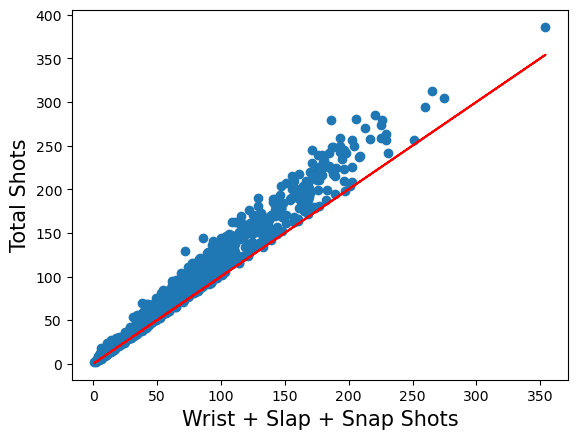

In [20]:
# verify whether total shots = wrist + slap + snap
x = df_hockeyAbs_main_nonempty_minGP['Wrist'] \
    + df_hockeyAbs_main_nonempty_minGP['Slap'] \
    + df_hockeyAbs_main_nonempty_minGP['Snap'] \
    #+ df_hockeyAbs_main_nonempty_minGP['Blkd']    
y = df_hockeyAbs_main_nonempty_minGP['Sh'].values
x = x.values

fig, ax = scatterPlot(x, y)
ax.plot(x, x, c='r')
#ax.plot(x, 1.5 * x, c='r')
ax.set_xlabel('Wrist + Slap + Snap Shots', fontsize=15)
ax.set_ylabel('Total Shots', fontsize=15)

**$\bullet$ Shots is greater than or equal to the sum of three shot types; suspect something missing from sum**

**$\bullet$ See analyseShotData notebook for further exploration of this issue**

## Start with 1D histograms

### Note: a $^{\prime}$ symbol is used to indicate features which have been normalised by TOI

Text(0.5, 0, 'G$^{\\prime}$ (min$^{-1}$)')

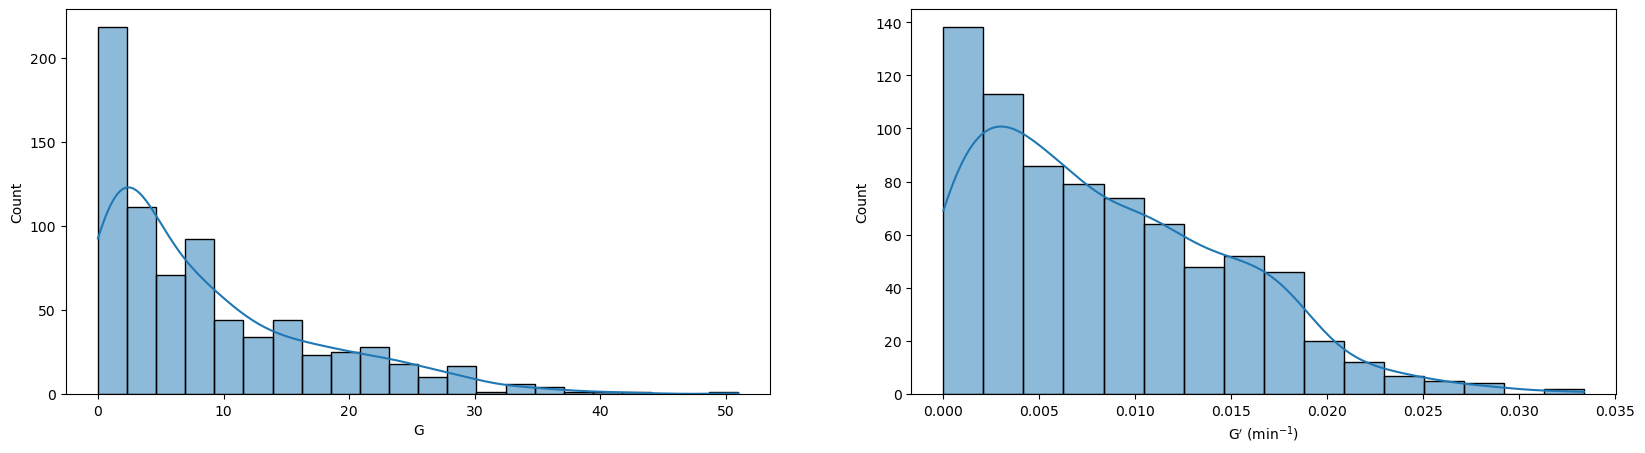

In [21]:
# compare distributions for unnormalised and normalised goal feature
fig, ax = plt.subplots(1, 2, figsize=[20, 5])

ax1 = sns.histplot(data=df_hockeyAbs_main_nonempty_minGP, 
             x='G', 
             kde=True, 
             line_kws={'color': 'orange'}, 
             ax=ax[0]
            )

ax2 = sns.histplot(data=df_hockeyAbs_main_nonempty_minGP_norm, 
             x='G', 
             kde=True, 
             ax=ax[1]
            )
ax[1].set_xlabel(r'G$^{\prime}$ (min$^{-1}$)')

**$\bullet$ whereas the left-hand plot suggests 2-3 clusters in the raw goal data, the right-hand plot suggests 3-4 clusters in the goal rate**

np.float64(1.4723623340155554)

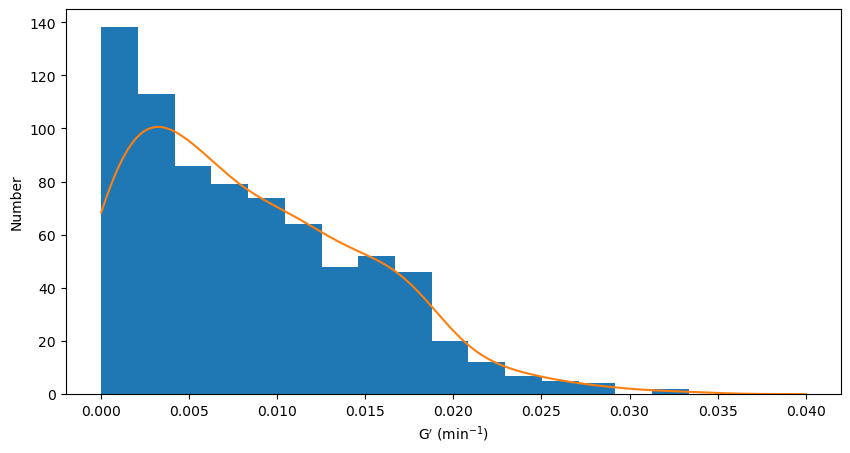

In [22]:
# test sklearn's KDE class on normalised goal feature
# note: attempting to reproduce right-hand plot from seaborn above
#KernelDensity.fit?
kde = KernelDensity(bandwidth=2e-3, 
                    algorithm='auto', 
                    kernel='gaussian'
                   )

kde.fit(df_hockeyAbs_main_nonempty_minGP_norm['G'].values.reshape(-1 ,1))

#-----

fig, ax = plt.subplots(1, 1, figsize=[10, 5])
ax.hist(df_hockeyAbs_main_nonempty_minGP_norm['G'].values, 
        bins=16
       )

X_plot = np.linspace(0., 4e-2, 1000)[:, np.newaxis]
log_dens = kde.score_samples(X_plot)
ax.plot(X_plot[:, 0], 1.6 * np.exp(log_dens))  # multiplicative factor found by trial-and-error
#ax.fill_between(X_plot[:, 0], 1.6 * np.exp(log_dens), 0.)

ax.set_xlabel(r'G$^{\prime}$ (min$^{-1}$)')
ax.set_ylabel('Number')

#-----

# compute area under KDE
from scipy import integrate
integrate.simpson(1.6 * np.exp(log_dens), x=X_plot.reshape(-1))

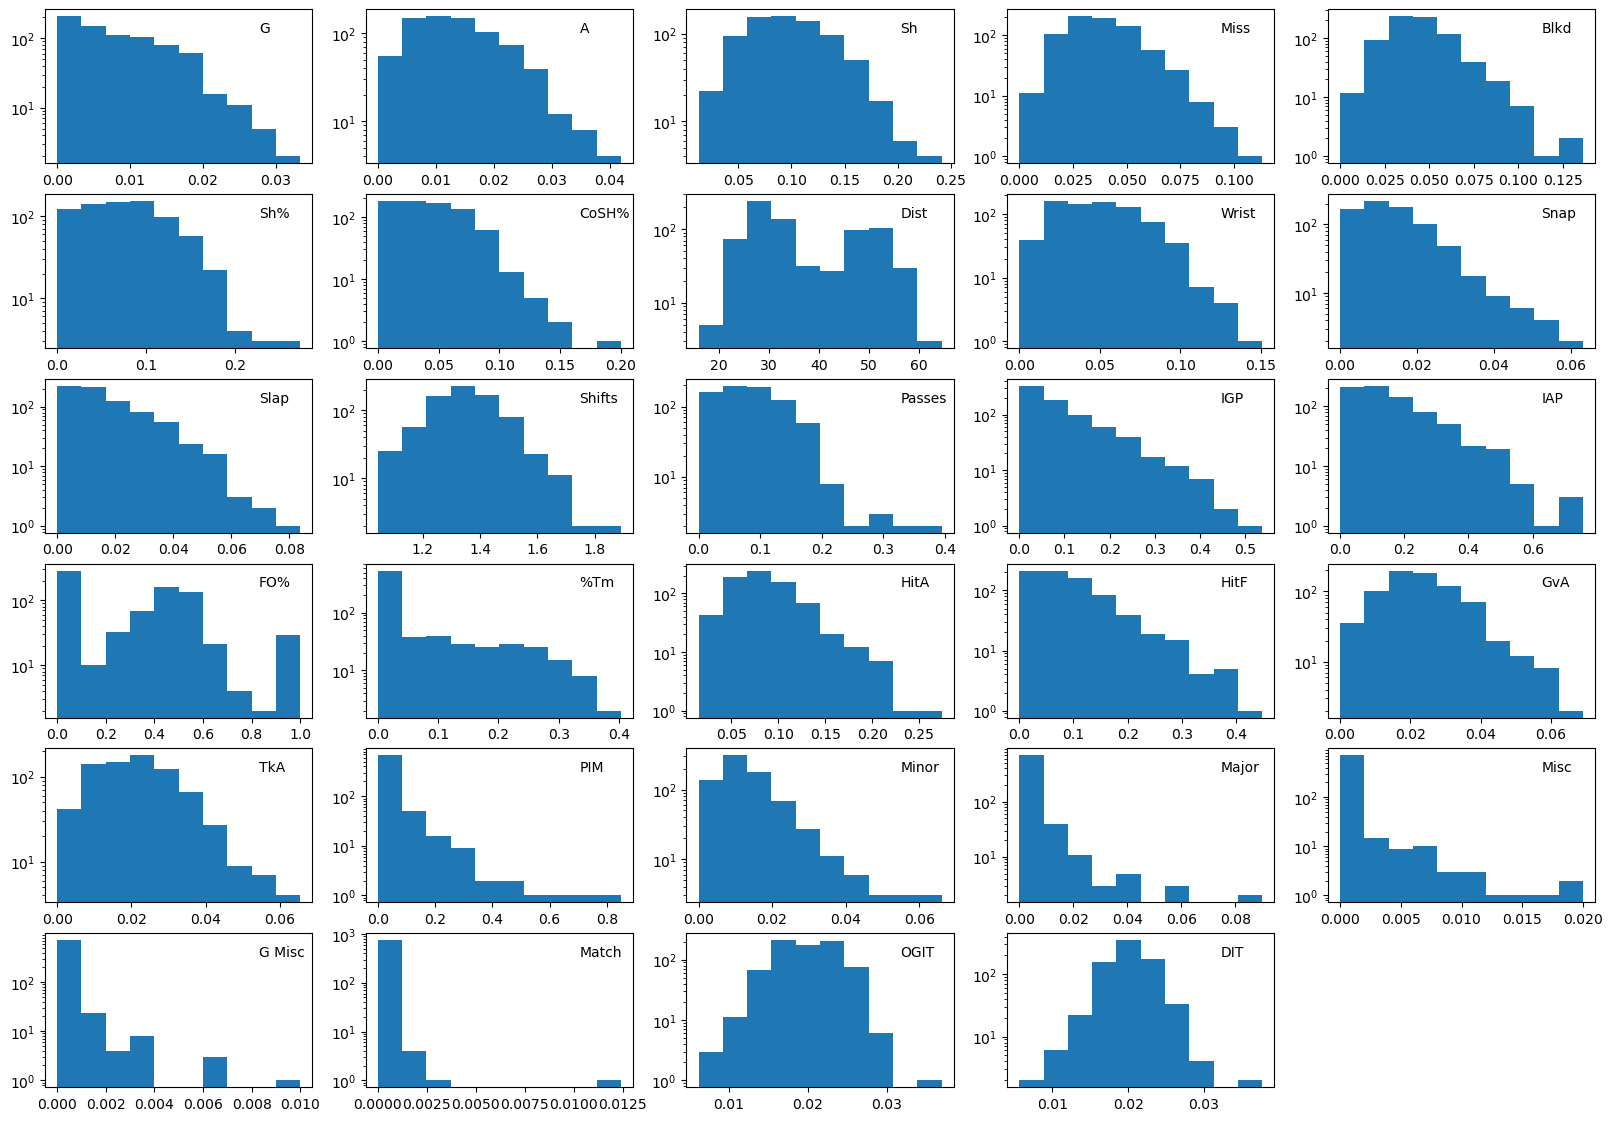

In [23]:
# plot histograms for features of interest using matplotlib
fig, ax = plt.subplots(6, 5, figsize=(20, 14))
ax[5, 4].remove()

ct = 0
for i in range(0, ax.shape[0]):
    for j in range(0, ax.shape[1]):
        if ct >= len(cumulative):
            break
        
        #if cumulativeStats[ct]:
        if cumulative[exploreCols[ct]]:
            #ax[i, j].hist(df_hockeyAbs_main_nonempty_minGP[exploreCols[ct]] / df_hockeyAbs_main_nonempty_minGP['TOI'])
            ax[i, j].hist(df_hockeyAbs_main_nonempty_minGP_norm[exploreCols[ct]])
        else:
            #ax[i, j].hist(df_hockeyAbs_main_nonempty_minGP[exploreCols[ct]])
            ax[i, j].hist(df_hockeyAbs_main_nonempty_minGP_norm[exploreCols[ct]])

        ax[i, j].text(0.80, 0.85, exploreCols[ct], transform=ax[i, j].transAxes)
        ax[i, j].set_yscale('log')
        
        ct += 1

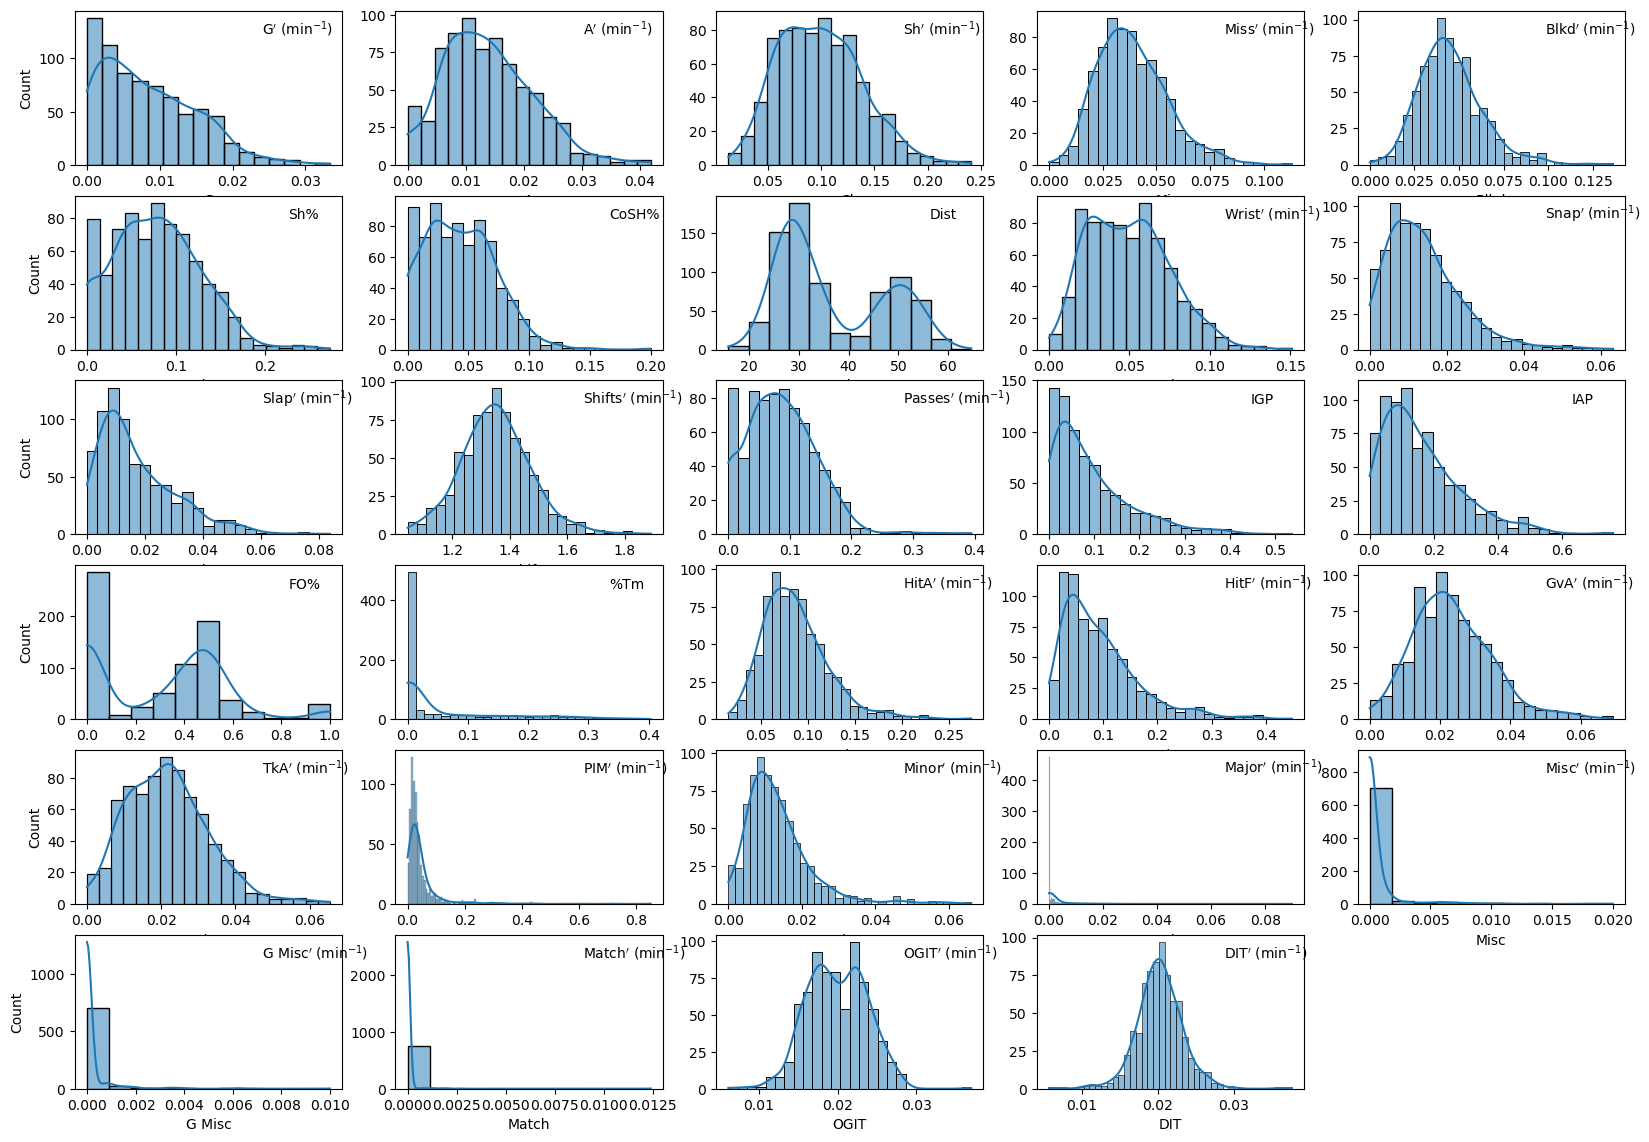

In [24]:
# as above, but using seaborn
fig, ax = plt.subplots(6, 5, figsize=(20, 14))
ax[5, 4].remove()

ct = 0
for i in range(0, ax.shape[0]):
    for j in range(0, ax.shape[1]):
        if ct >= len(cumulative):
            break
            
        #ax[i, j].set_yscale('log')
        sns.histplot(data=df_hockeyAbs_main_nonempty_minGP_norm, 
                     x=exploreCols[ct], 
                     kde=True, 
                     ax=ax[i, j], 
                     #kde_kws={'log_scale': False}
                    )

        # remove extraneous y-axis labels
        if j > 0:
            ax[i, j].set_ylabel('')

        # add feature labels
        if cumulative[exploreCols[ct]]:
            ax[i, j].text(0.70, 0.85, exploreCols[ct] + r'$^{\prime}$ (min$^{-1}$)', transform=ax[i, j].transAxes)
        else:
            ax[i, j].text(0.80, 0.85, exploreCols[ct], transform=ax[i, j].transAxes)
        
        ct += 1

**$\bullet$ unimodal distributions: A, Miss, Blkd, Snap, Slap, Shifts, Passes, IGP, IAP, %Tm, HitA, PIM, Minor, Major, Misc, G Misc, Match, DIT**

**$\bullet$ distributions with multiple modes: G, Sh, Sh%, CoSH%, Dist, Wrist, FO%, TkA, OGIT**

**$\bullet$ distributions suspected of having multiple modes: HitF, GvA**

**$\bullet$ most distributions have tails to high values**

In [25]:
# normalised features, in descending order of min-max range: 
#      PIM (0.80), 
#   shifts (0.70), 
#   Passes (0.40), 
#     HitF (0.40), 
#       Sh (0.20), 
#     HitA (0.20), 
#    Wrist (0.15), 
#     Blkd (0.12), 
#     Miss (0.10), 
#     Slap (0.08), 
#    Major (0.08), 
#      GvA (0.07), 
#     Snap (0.06), 
#      TkA (0.06), 
#    Minor (0.06), 
#        A (0.04), 
#        G (0.03), 
#     OGIT (0.03), 
#      DIT (0.03), 
#     Misc (0.02), 
#   G Misc (0.01), 
#    Match (0.002)

In [26]:
# percentage features, in descending order of min-max range:
#   FO% (1.00), 
#   IAP (0.70), 
#   KiP (0.50), 
#   %Tm (0.40), 
#   Sh% (0.30), 
# CoSH% (0,20)

## Now look for potential relationships between features via scatter plots

Text(0, 0.5, 'G')

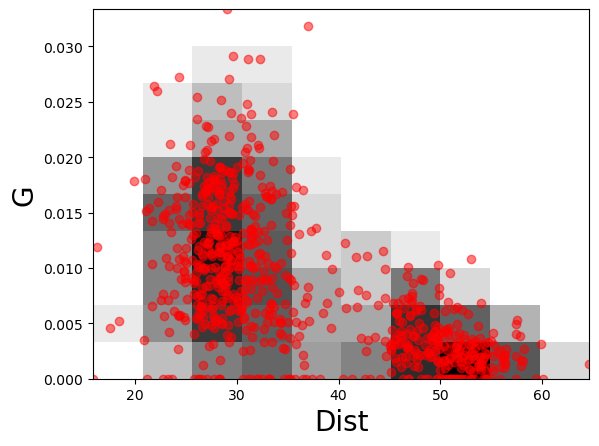

In [27]:

xStat = 'Dist'
yStat = 'G'

x = df_hockeyAbs_main_nonempty_minGP_norm[xStat].copy()
y = df_hockeyAbs_main_nonempty_minGP_norm[yStat].copy()

fig, ax = scatterPlot(x, 
                      y, 
                      c='red', 
                      alpha=0.5, 
                      zorder=2
                     )
_ = ax.hist2d(x, 
              y, 
              cmap='Greys', 
              norm='log', 
              zorder=1
             )
ax.set_xlabel(xStat, fontsize=20)
ax.set_ylabel(yStat, fontsize=20)

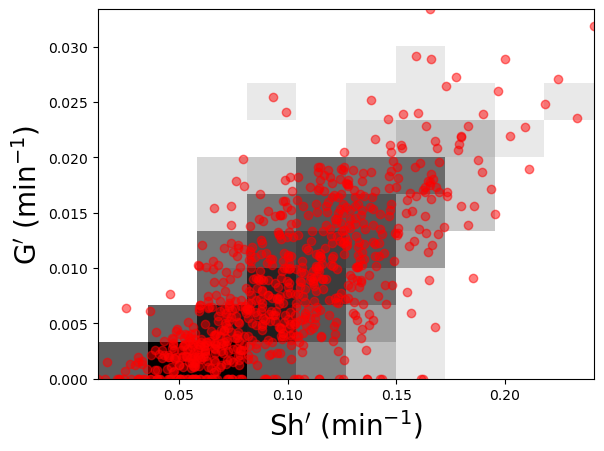

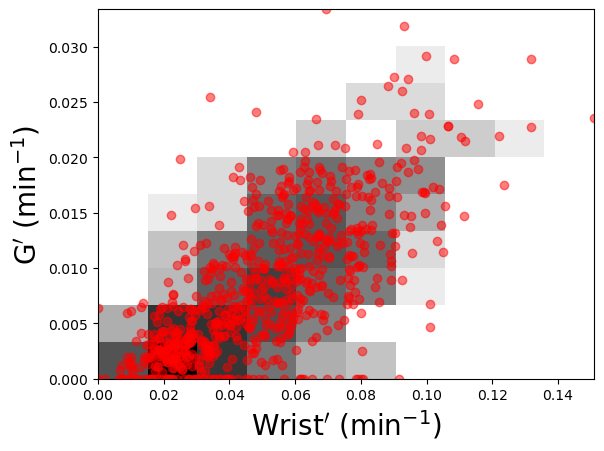

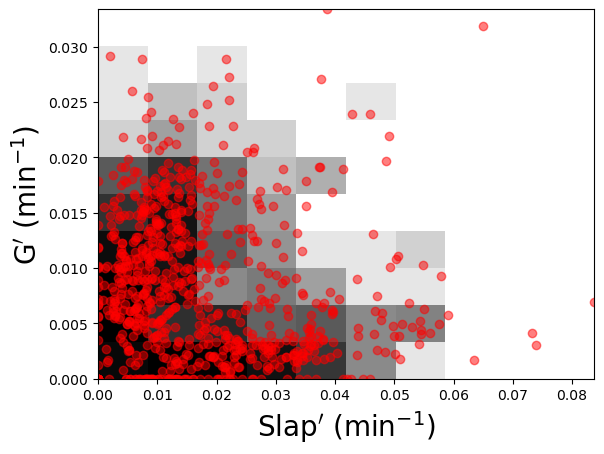

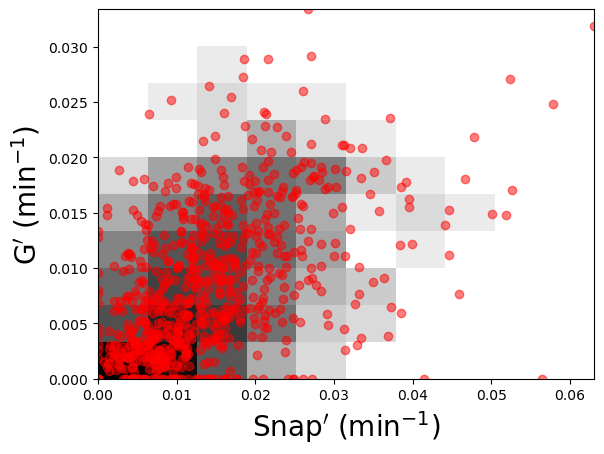

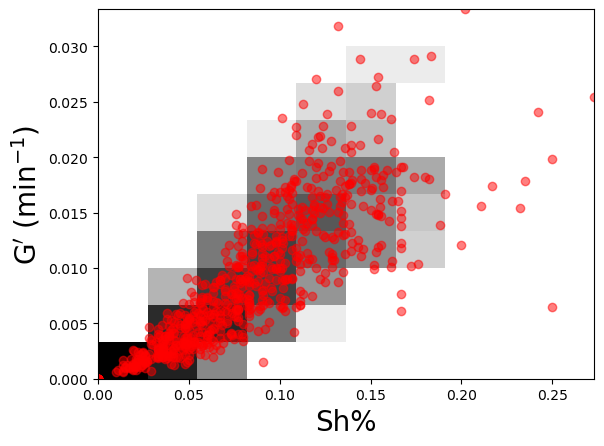

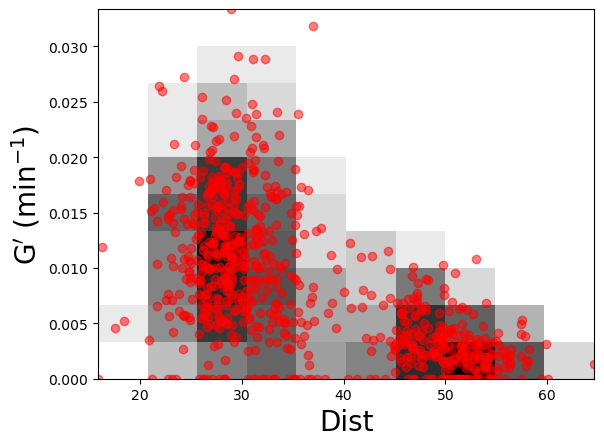

In [28]:
# plot normalised G versus features suspsected of being relevant to goal-scoring

xStats = ['Sh', 'Wrist', 'Slap', 'Snap', 'Sh%', 'Dist']
yStats = ['G', 'G', 'G', 'G', 'G', 'G']

for i, xStat in enumerate(xStats):
    x = df_hockeyAbs_main_nonempty_minGP_norm[xStats[i]].copy()
    y = df_hockeyAbs_main_nonempty_minGP_norm[yStats[i]].copy()
    
    fig, ax = scatterPlot(x, 
                          y, 
                          c='red', 
                          alpha=0.5, 
                          zorder=2
                         )
    
    _ = ax.hist2d(x, 
                  y, 
                  cmap='Greys', 
                  norm='log', 
                  zorder=1
                 )
    
    xlabel = xStat
    if cumulative[xStat]:
        xlabel += r'$^{\prime}$ (min$^{-1}$)'
    ax.set_xlabel(xlabel, fontsize=20)
    
    ylabel = yStat
    if cumulative[yStat]:
        ylabel += r'$^{\prime}$ (min$^{-1}$)'
    ax.set_ylabel(ylabel, fontsize=20)

**$\bullet$ goal rate and shot rate are clearly correlated, which is largely driven by rate of wrist shots**

**$\bullet$ high slap shot rate seldom associated with high goal rate**

**$\bullet$ no relationship between goal rate and snap shot rate**

**$\bullet$ the tight relationship between goal rate and shooting percentage is likely the result that TOI and total number of shots are correlated**

**$\bullet$ I see only see clusters in the G$^{\prime}$ - Dist plane -- it shows at least two clusters **

**$\bullet$ goal rates above 0.01 / min are only achieved with mean shot distances below 45 ft; highest rates associated with mean shot distances between 25-35 feet**

Text(0, 0.5, 'Shots')

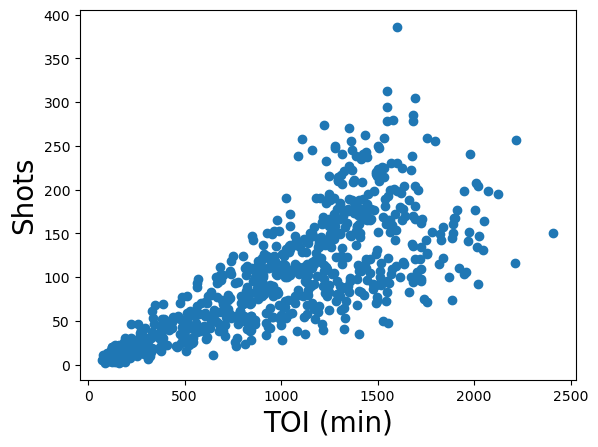

In [29]:
# plot total number of shots versus TOI
fig, ax = scatterPlot(df_hockeyAbs_main_nonempty_minGP['TOI'], 
                      df_hockeyAbs_main_nonempty_minGP['Sh'], 
                      #c='red', 
                      #alpha=0.5, 
                      #zorder=2
                     )

ax.set_xlabel('TOI (min)', fontsize=20)
ax.set_ylabel('Shots', fontsize=20)

**$\bullet$ total numbers of shots is increasing function of TOI but there are two (maybe four) branches in relation (F vs D?)**

# EXPORT DATA

In [30]:
# save dataframe of cleaned and trimmed player data to file

path = '../data/'
filename = 'nhlPlayerStats_13-14_main_utf8_nonempty_minGP.csv'
df_hockeyAbs_main_nonempty_minGP.to_csv(path + filename)

In [31]:
# save dataframe of TOI-normalised player data to file

path = '../data/'
filename = 'nhlPlayerStats_13-14_main_utf8_nonempty_minGP_norm.csv'
df_hockeyAbs_main_nonempty_minGP_norm.to_csv(path + filename)